In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data
- Simulate a Dataset using numpy.
- linspace() is a packgae in numpy to create your numbers.
- sin() function is a function that converts an input number to its equivalent sine value.

In [2]:
x = np.linspace(0,100,501)
y = np.sin(x)

In [3]:
x, y

(array([  0. ,   0.2,   0.4,   0.6,   0.8,   1. ,   1.2,   1.4,   1.6,
          1.8,   2. ,   2.2,   2.4,   2.6,   2.8,   3. ,   3.2,   3.4,
          3.6,   3.8,   4. ,   4.2,   4.4,   4.6,   4.8,   5. ,   5.2,
          5.4,   5.6,   5.8,   6. ,   6.2,   6.4,   6.6,   6.8,   7. ,
          7.2,   7.4,   7.6,   7.8,   8. ,   8.2,   8.4,   8.6,   8.8,
          9. ,   9.2,   9.4,   9.6,   9.8,  10. ,  10.2,  10.4,  10.6,
         10.8,  11. ,  11.2,  11.4,  11.6,  11.8,  12. ,  12.2,  12.4,
         12.6,  12.8,  13. ,  13.2,  13.4,  13.6,  13.8,  14. ,  14.2,
         14.4,  14.6,  14.8,  15. ,  15.2,  15.4,  15.6,  15.8,  16. ,
         16.2,  16.4,  16.6,  16.8,  17. ,  17.2,  17.4,  17.6,  17.8,
         18. ,  18.2,  18.4,  18.6,  18.8,  19. ,  19.2,  19.4,  19.6,
         19.8,  20. ,  20.2,  20.4,  20.6,  20.8,  21. ,  21.2,  21.4,
         21.6,  21.8,  22. ,  22.2,  22.4,  22.6,  22.8,  23. ,  23.2,
         23.4,  23.6,  23.8,  24. ,  24.2,  24.4,  24.6,  24.8,  25. ,
      

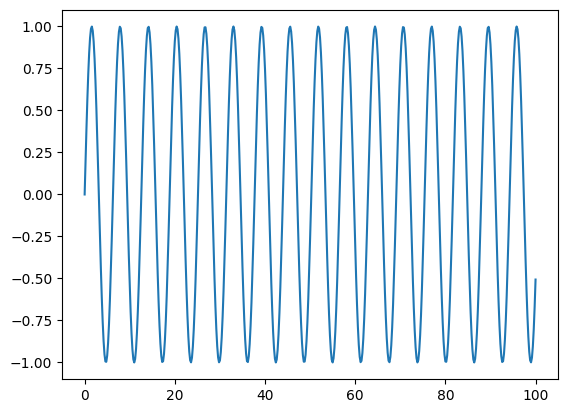

In [4]:
plt.plot(x,y)

- Transform the data into a dataframe.

In [5]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])
df

## Train Test Split

- Note that in splitting a time series dataset DO NOT PERFORM RANDOM SPLIT!
- The split should be sequential, example if you are given a data from January to December, the training data can be from Jan 1 to Dec 14, while the testing data is from Dec 15-31.

In [74]:
len(df)
test_percent = 0.1
test_point = np.round(len(df)*test_percent)
print(f"Test Point: {test_point}")
test_ind = int(len(df) - test_point)
print(f"Test Index: {test_ind}")

Test Point: 50.0
Test Index: 451


In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [14]:
train

,Sine
0.0,0.000000
0.2,0.198669
0.4,0.389418
0.6,0.564642
0.8,0.717356
...,...
89.2,0.944282
89.4,0.990849
89.6,0.997914
89.8,0.965195


In [15]:
test

,Sine
90.2,0.787158
90.4,0.648937
90.6,0.484846
90.8,0.301425
91.0,0.105988
91.2,-0.093676
91.4,-0.289604
91.6,-0.473987
91.8,-0.639473
92.0,-0.779466


## Scale Data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
scaler.fit(train)

- The warning can be ignored, it is just telling us that python is converting the input into floats.
- Fit the training data

In [19]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [23]:
len(scaled_train)

451

In [24]:
len(generator) # n_input = 2

449

In [25]:
# scaled_train

In [26]:
# What does the first batch look like?
X,y = generator[0]

In [27]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.49999843 0.59933376]
Predict this y: 
 [[0.6947089]]


In [28]:
# Let's redefine to get 10 steps back and then predict the next step out
length = 10 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [29]:
# What does the first batch look like?
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

In [31]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

Now you will be able to edit the length so that it makes sense for your time series!

### Create the Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [33]:
# We're only using one feature in our time series
n_features = 1

In [34]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# fit model
model.fit_generator(generator,epochs=5)

C:\Users\PC 05\AppData\Local\Temp\ipykernel_3464\2200378995.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=5)


Epoch 1/5


401/401 [==============================] - 10s 14ms/step - loss: 0.0082
Epoch 2/5
401/401 [==============================] - 4s 11ms/step - loss: 3.6946e-04
Epoch 3/5
401/401 [==============================] - 4s 11ms/step - loss: 2.6425e-04
Epoch 4/5
401/401 [==============================] - 4s 11ms/step - loss: 9.2411e-04
Epoch 5/5
401/401 [==============================] - 4s 11ms/step - loss: 5.8368e-06


In [37]:
model.history.history.keys()

dict_keys(['loss'])

<Axes: >

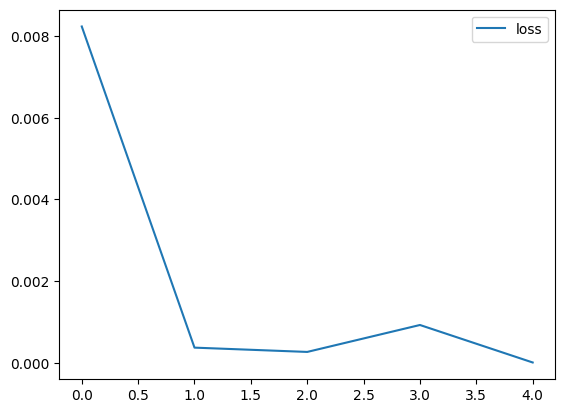

In [38]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [39]:
first_eval_batch = scaled_train[-length:]

In [40]:
first_eval_batch

array([[1.99131069e-03],
       [2.07857970e-02],
       [5.86849788e-02],
       [1.14177935e-01],
       [1.85052337e-01],
       [2.68482646e-01],
       [3.61142758e-01],
       [4.59338608e-01],
       [5.59155437e-01],
       [6.56613862e-01],
       [7.47828524e-01],
       [8.29162983e-01],
       [8.97374689e-01],
       [9.49744258e-01],
       [9.84183880e-01],
       [9.99320556e-01],
       [9.94550835e-01],
       [9.70064869e-01],
       [9.26838839e-01],
       [8.66596028e-01],
       [7.91738127e-01],
       [7.05249486e-01],
       [6.10578132e-01],
       [5.11498315e-01],
       [4.11960033e-01],
       [3.15931565e-01],
       [2.27241262e-01],
       [1.49424926e-01],
       [8.55848492e-02],
       [3.82661343e-02],
       [9.35522889e-03],
       [4.71955842e-06],
       [1.05873816e-02],
       [4.06813177e-02],
       [8.90867775e-02],
       [1.53873988e-01],
       [2.32460088e-01],
       [3.21712097e-01],
       [4.18071820e-01],
       [5.17697698e-01],


In [41]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [42]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 465ms/step


array([[0.8938962]], dtype=float32)

In [43]:
scaled_test[0]

array([0.89357993])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [44]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [45]:
current_batch.shape

(1, 50, 1)

In [46]:
current_batch

array([[[1.99131069e-03],
        [2.07857970e-02],
        [5.86849788e-02],
        [1.14177935e-01],
        [1.85052337e-01],
        [2.68482646e-01],
        [3.61142758e-01],
        [4.59338608e-01],
        [5.59155437e-01],
        [6.56613862e-01],
        [7.47828524e-01],
        [8.29162983e-01],
        [8.97374689e-01],
        [9.49744258e-01],
        [9.84183880e-01],
        [9.99320556e-01],
        [9.94550835e-01],
        [9.70064869e-01],
        [9.26838839e-01],
        [8.66596028e-01],
        [7.91738127e-01],
        [7.05249486e-01],
        [6.10578132e-01],
        [5.11498315e-01],
        [4.11960033e-01],
        [3.15931565e-01],
        [2.27241262e-01],
        [1.49424926e-01],
        [8.55848492e-02],
        [3.82661343e-02],
        [9.35522889e-03],
        [4.71955842e-06],
        [1.05873816e-02],
        [4.06813177e-02],
        [8.90867775e-02],
        [1.53873988e-01],
        [2.32460088e-01],
        [3.21712097e-01],
        [4.1

In [47]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[2.07857970e-02],
        [5.86849788e-02],
        [1.14177935e-01],
        [1.85052337e-01],
        [2.68482646e-01],
        [3.61142758e-01],
        [4.59338608e-01],
        [5.59155437e-01],
        [6.56613862e-01],
        [7.47828524e-01],
        [8.29162983e-01],
        [8.97374689e-01],
        [9.49744258e-01],
        [9.84183880e-01],
        [9.99320556e-01],
        [9.94550835e-01],
        [9.70064869e-01],
        [9.26838839e-01],
        [8.66596028e-01],
        [7.91738127e-01],
        [7.05249486e-01],
        [6.10578132e-01],
        [5.11498315e-01],
        [4.11960033e-01],
        [3.15931565e-01],
        [2.27241262e-01],
        [1.49424926e-01],
        [8.55848492e-02],
        [3.82661343e-02],
        [9.35522889e-03],
        [4.71955842e-06],
        [1.05873816e-02],
        [4.06813177e-02],
        [8.90867775e-02],
        [1.53873988e-01],
        [2.32460088e-01],
        [3.21712097e-01],
        [4.18071820e-01],
        [5.1

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [48]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 54ms/step


In [49]:
test_predictions

[array([0.8938962], dtype=float32),
 array([0.8239916], dtype=float32),
 array([0.7416266], dtype=float32),
 array([0.649938], dtype=float32),
 array([0.55232424], dtype=float32),
 array([0.45278576], dtype=float32),
 array([0.35442978], dtype=float32),
 array([0.2620384], dtype=float32),
 array([0.17908901], dtype=float32),
 array([0.10929482], dtype=float32),
 array([0.05493705], dtype=float32),
 array([0.01807119], dtype=float32),
 array([0.00030945], dtype=float32),
 array([0.00219748], dtype=float32),
 array([0.02435302], dtype=float32),
 array([0.06518127], dtype=float32),
 array([0.12346562], dtype=float32),
 array([0.19667447], dtype=float32),
 array([0.28185293], dtype=float32),
 array([0.37580657], dtype=float32),
 array([0.4747438], dtype=float32),
 array([0.5749191], dtype=float32),
 array([0.672084], dtype=float32),
 array([0.7626862], dtype=float32),
 array([0.8427756], dtype=float32),
 array([0.90923136], dtype=float32),
 array([0.95907795], dtype=float32),
 array([0.990

In [50]:
scaled_test

array([[8.93579930e-01],
       [8.24469273e-01],
       [7.42422987e-01],
       [6.50712000e-01],
       [5.52992537e-01],
       [4.53160367e-01],
       [3.55195483e-01],
       [2.63003435e-01],
       [1.80259630e-01],
       [1.10262802e-01],
       [5.58035031e-02],
       [1.90528543e-02],
       [1.47598790e-03],
       [3.77363801e-03],
       [2.58542046e-02],
       [6.68374052e-02],
       [1.25089369e-01],
       [1.98287774e-01],
       [2.83514430e-01],
       [3.77371621e-01],
       [4.76117555e-01],
       [5.75815544e-01],
       [6.72490945e-01],
       [7.62289613e-01],
       [8.41631559e-01],
       [9.07353670e-01],
       [9.56835814e-01],
       [9.88105292e-01],
       [9.99915490e-01],
       [9.91795573e-01],
       [9.64069255e-01],
       [9.17841898e-01],
       [8.54956441e-01],
       [7.77919927e-01],
       [6.89803561e-01],
       [5.94120263e-01],
       [4.94684624e-01],
       [3.95460830e-01],
       [3.00404621e-01],
       [2.13305586e-01],


## Inverse Transformations and Compare

In [51]:
true_predictions = scaler.inverse_transform(test_predictions)

In [52]:
true_predictions

array([[ 0.78779035],
       [ 0.64798203],
       [ 0.48325317],
       [ 0.29987712],
       [ 0.10465092],
       [-0.09442471],
       [-0.29113536],
       [-0.47591687],
       [-0.64181457],
       [-0.78140203],
       [-0.89011683],
       [-0.96384806],
       [-0.99937132],
       [-0.99559528],
       [-0.95128448],
       [-0.86962853],
       [-0.75306061],
       [-0.60664389],
       [-0.43628809],
       [-0.24838207],
       [-0.0505089 ],
       [ 0.14984035],
       [ 0.3441688 ],
       [ 0.52537203],
       [ 0.68554975],
       [ 0.81846043],
       [ 0.91815294],
       [ 0.98088951],
       [ 1.00531486],
       [ 0.99010469],
       [ 0.93542637],
       [ 0.84242014],
       [ 0.71528559],
       [ 0.55972625],
       [ 0.38260973],
       [ 0.19073447],
       [-0.00899257],
       [-0.20861101],
       [-0.4002516 ],
       [-0.57571993],
       [-0.72794572],
       [-0.85106954],
       [-0.94050333],
       [-0.99272669],
       [-1.00562227],
       [-0

In [53]:
test

,Sine
90.2,0.787158
90.4,0.648937
90.6,0.484846
90.8,0.301425
91.0,0.105988
91.2,-0.093676
91.4,-0.289604
91.6,-0.473987
91.8,-0.639473
92.0,-0.779466


In [54]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

C:\Users\PC 05\AppData\Local\Temp\ipykernel_3464\1339453577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [55]:
test

,Sine,Predictions
90.2,0.787158,0.787790
90.4,0.648937,0.647982
90.6,0.484846,0.483253
90.8,0.301425,0.299877
91.0,0.105988,0.104651
91.2,-0.093676,-0.094425
91.4,-0.289604,-0.291135
91.6,-0.473987,-0.475917
91.8,-0.639473,-0.641815
92.0,-0.779466,-0.781402


<Axes: >

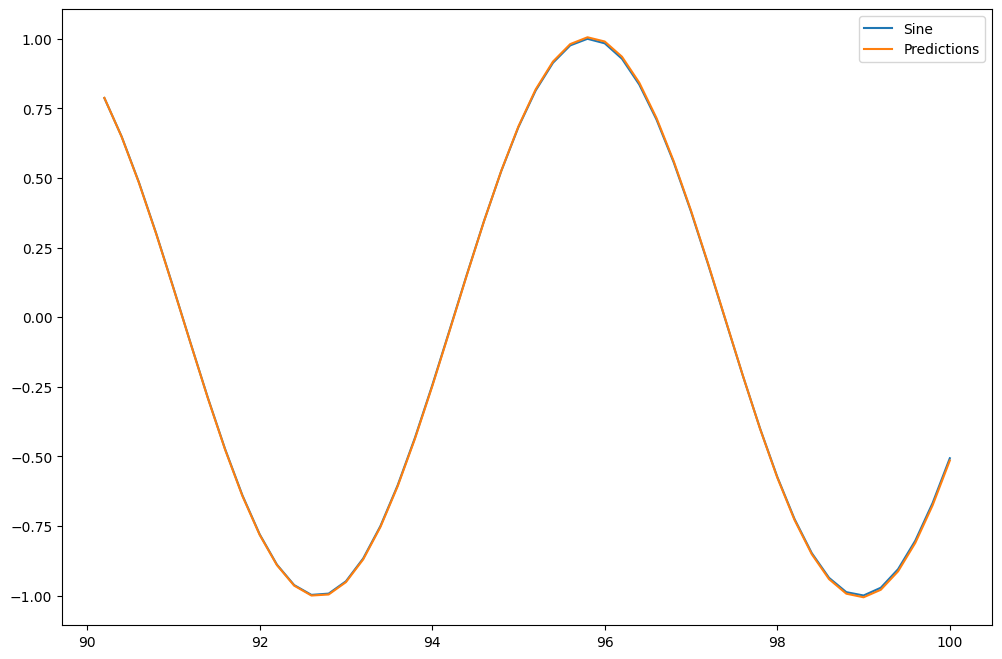

In [56]:
test.plot(figsize=(12,8))

## Adding in Early Stopping and Validation Generator

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [59]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=1)


validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length,batch_size=1)

# LSTMS

In [60]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [61]:
model.fit_generator(generator,epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

C:\Users\PC 05\AppData\Local\Temp\ipykernel_3464\1950115197.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,


Epoch 1/20


402/402 [==============================] - 18s 27ms/step - loss: 0.0386 - val_loss: 5.2153e-06
Epoch 2/20
402/402 [==============================] - 10s 24ms/step - loss: 2.3343e-05 - val_loss: 2.6498e-05
Epoch 3/20
402/402 [==============================] - 8s 19ms/step - loss: 2.8723e-05 - val_loss: 1.0391e-05


In [62]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 53ms/step


C:\Users\PC 05\AppData\Local\Temp\ipykernel_3464\1584625205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<Axes: >

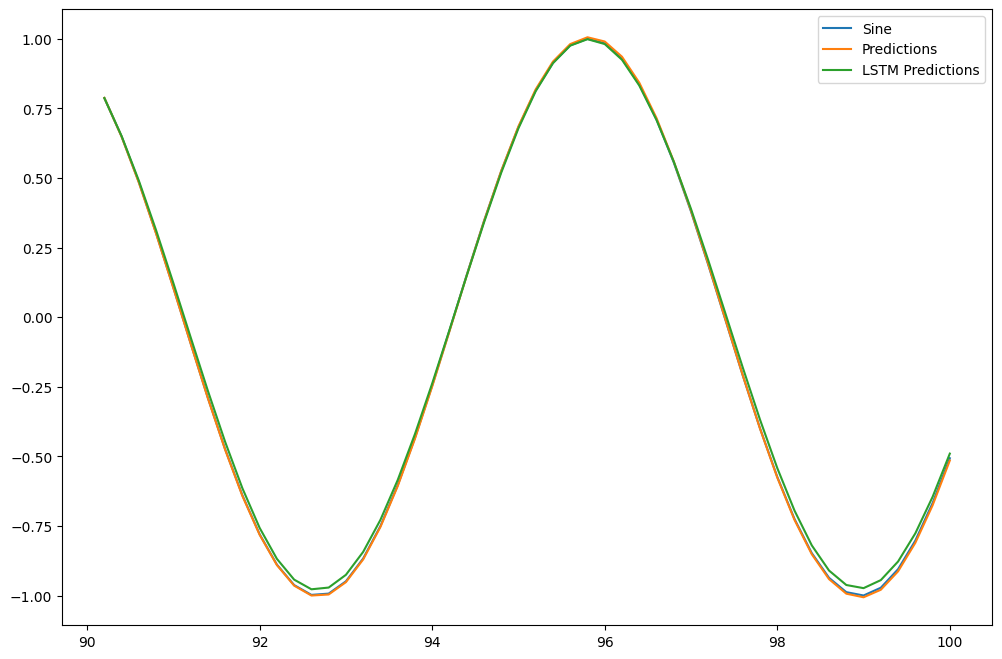

In [63]:
# IGNORE WARNINGS
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

# Forecasting

Forecast into unknown range. We should first utilize all our data, since we are now forecasting!

In [64]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [65]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [66]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

Epoch 1/6


C:\Users\PC 05\AppData\Local\Temp\ipykernel_3464\2968077443.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=6)


451/451 [==============================] - 18s 23ms/step - loss: 0.0256
Epoch 2/6
451/451 [==============================] - 9s 20ms/step - loss: 4.2838e-05
Epoch 3/6
451/451 [==============================] - 8s 19ms/step - loss: 1.1284e-04
Epoch 4/6
451/451 [==============================] - 9s 20ms/step - loss: 2.1692e-04
Epoch 5/6
451/451 [==============================] - 9s 20ms/step - loss: 1.2652e-04
Epoch 6/6
451/451 [==============================] - 9s 21ms/step - loss: 2.3637e-04


In [67]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 37ms/step


In [68]:
forecast = scaler.inverse_transform(forecast)

In [69]:
df

,Sine
0.0,0.000000
0.2,0.198669
0.4,0.389418
0.6,0.564642
0.8,0.717356
...,...
99.2,-0.971378
99.4,-0.904823
99.6,-0.802196
99.8,-0.667588


In [70]:
len(forecast)

50

In [71]:
forecast_index = np.arange(50.1,55.1,step=0.1)
len(forecast_index)

50

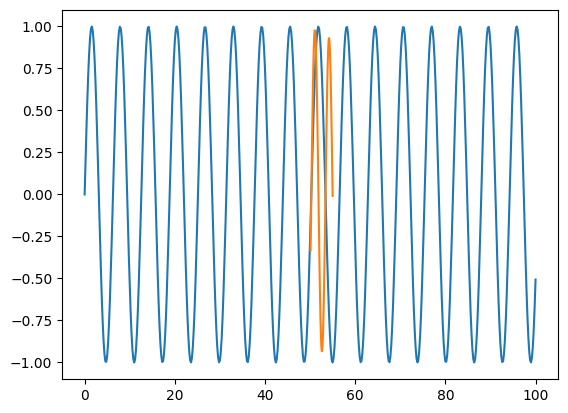

In [72]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)